# Project 1 - Part 1 (Core)
 - Author: Walaa abdalaziz


Project Overview

Load and Inspect Data

In [14]:
import pandas as pd
fname = "/content/drive/MyDrive/AXSOSACADEMY/01-Fundamentals/Week02/sales_predictions_2023.csv"
df = pd.read_csv(fname)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Clean Data

In [ ]:
print("raws and columns of the dataset:", df.shape)
print("\nData Types:\n", df.dtypes)
duplicates = df.duplicated().sum()

print("\nNumber of duplicate rows:", duplicates)
df = df.drop_duplicates()
print("\nMissing Values:\n", df.isnull().sum())

df.fillna("0", inplace=True)
print("\nMissing Values After Cleaning:\n", df.isnull().sum())

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat'})
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF': 'Low Fat'})

min_values = df.min(numeric_only=True)
max_values = df.max(numeric_only=True)
mean_values = df.mean(numeric_only=True)

print("\nMinimum Values:\n", min_values)
print("\nMaximum Values:\n", max_values)
print("\nMean Values:\n", mean_values)

raws and columns of the dataset: (8523, 12)

Data Types:
 Item_Identifier               object
Item_Weight                   object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Number of duplicate rows: 0

Missing Values:
 Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Missing Values After Cleaning:
 Item_Identifier    

Exploratory Data Analysis

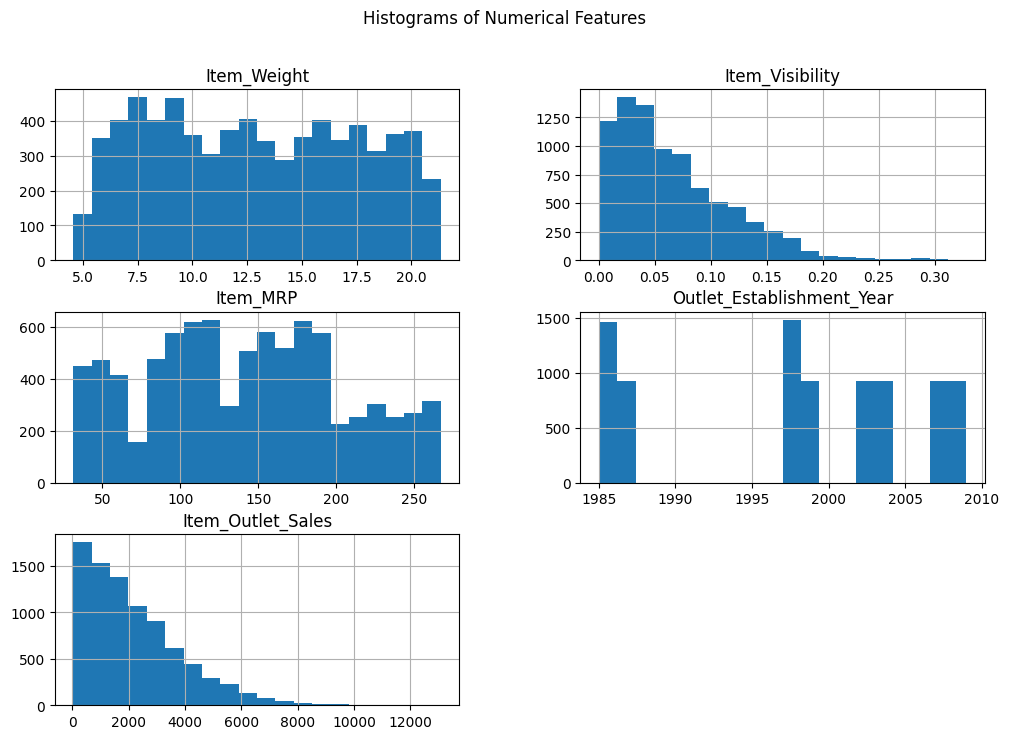

In [4]:
#Histograms to view the distributions of numerical features in your dataset.
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Create histograms for numeric columns
df[numeric_columns].hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

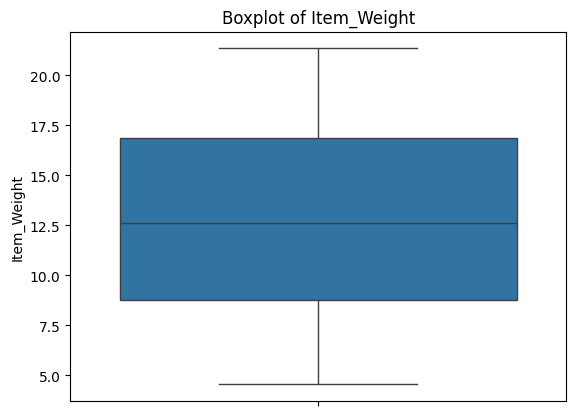

In [9]:
#Boxplots to view statistical summaries of numerical features in your dataset.
import seaborn as sns

# Create histograms for numeric columns
sns.boxplot(y=df["Item_Weight"])
plt.title("Boxplot of Item_Weight")
plt.ylabel("Item_Weight")
plt.show()

<ipython-input-11-647f22dd9967>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Outlet_Size", palette="viridis")


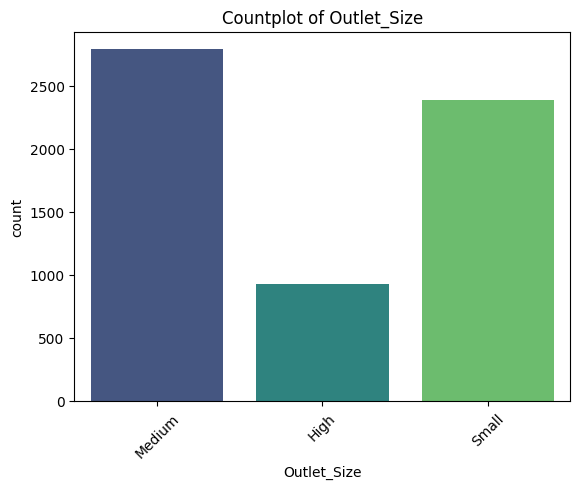

In [11]:
#Countplots to view the frequency of each class of categorial features in your dataset.
sns.countplot(data=df, x="Outlet_Size", palette="viridis")
plt.xticks(rotation=45)
plt.title(f"Countplot of Outlet_Size")

plt.show()

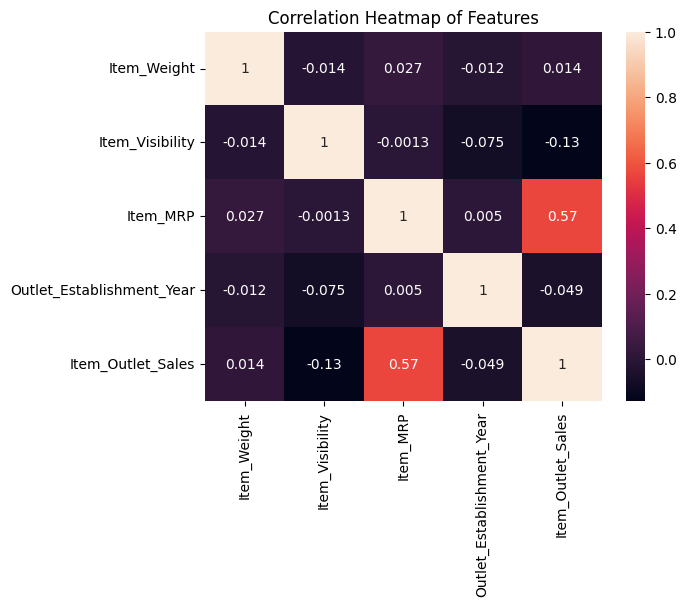

In [16]:
#Heatmap to view the correlation between features.
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Heatmap of Features")
plt.show()

Feature Inspection